In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from network_model import *

import sys
#!{sys.executable} -m pip install [arg]
import time

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({"font.size" : 15,
                     "figure.dpi" : 100, 
                     "grid.alpha" : 0.3, 
                     "axes.grid": True, 
                     "axes.axisbelow" : True,
                     "figure.figsize":(8,6),
                     "mathtext.fontset":"cm",
                     "xtick.labelsize": 14,
                     "ytick.labelsize": 14,
                     "axes.labelsize": 16, 
                     "legend.fontsize": 13.5})
USE_TEX = False
if USE_TEX:
    plt.rc("text", usetex=True)
    plt.rc("text.latex", preamble=r"""
     \usepackage{times}
     \usepackage{mathptmx}""")
else:
    plt.rc("text", usetex=False)
plt.rc("font", family="serif")

In [11]:
N = 1000
g = nx.powerlaw_cluster_graph(n=N, m=2, p=0.5)

In [122]:
timea = time.time()
W, I, C, A, R, P, GAMBLE_SUCCESS, communities = simulation(NUM_AGENTS=N,
                                                           STEPS=50,
                                                           PROJECT_COST=0.1,
                                                           graph=g,
                                                           seed=123,
                                                           DEFAULT_A=0.01)
print(time.time()-timea)

215 communities.
Computing optimal portfolios...
Performing time stepping...


 18%|█▊        | 9/50 [00:00<00:01, 20.82it/s]

Updating portfolios... (step = 10)


 36%|███▌      | 18/50 [00:07<00:13,  2.34it/s]

Updating portfolios... (step = 20)


 60%|██████    | 30/50 [00:12<00:05,  3.37it/s]

Updating portfolios... (step = 30)


 76%|███████▌  | 38/50 [00:18<00:04,  2.44it/s]

Updating portfolios... (step = 40)


100%|██████████| 50/50 [00:24<00:00,  2.05it/s]

34.37221121788025


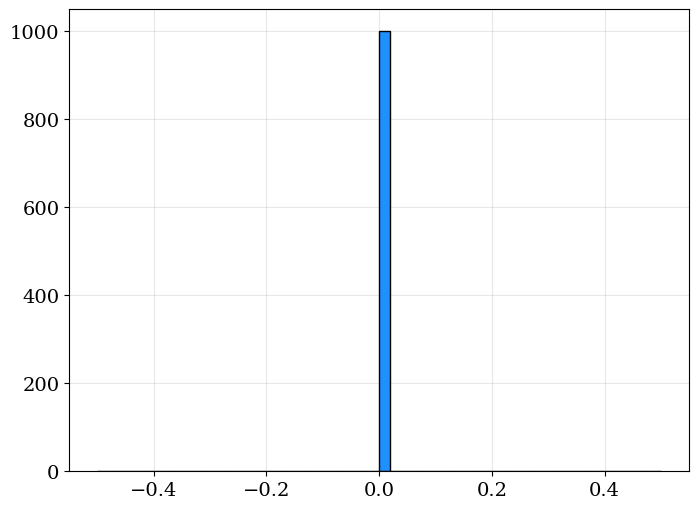

In [123]:
plt.hist(W[-1], bins=50, color="dodgerblue", edgecolor="k")
plt.show()

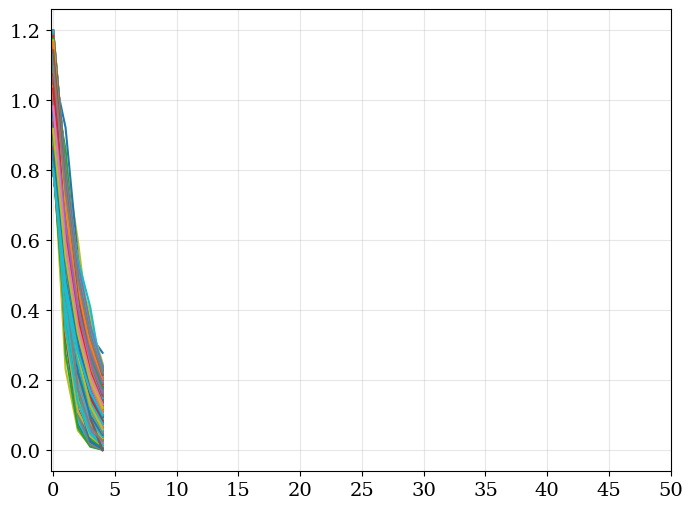

In [124]:
for i in range(W.shape[1]):
    plt.plot(W[:5,i])
plt.xticks(np.arange(0, len(W), 5))
plt.show()

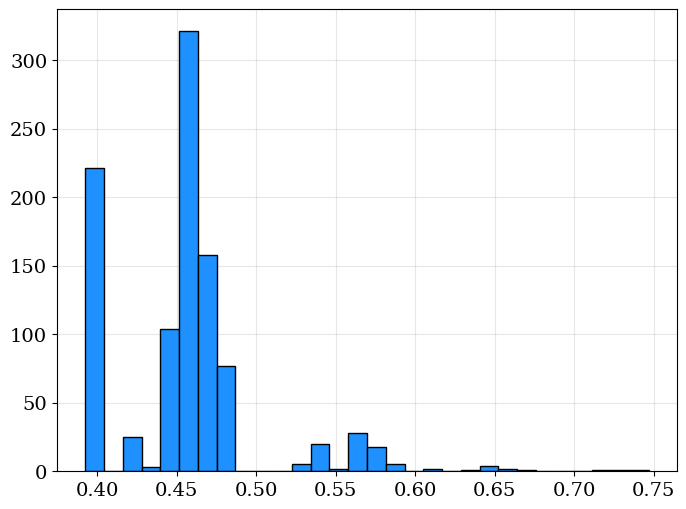

In [125]:
plt.hist(C[0], color="dodgerblue", edgecolor="k", bins=30)
plt.show()

In [15]:
33.9 / 4

8.475

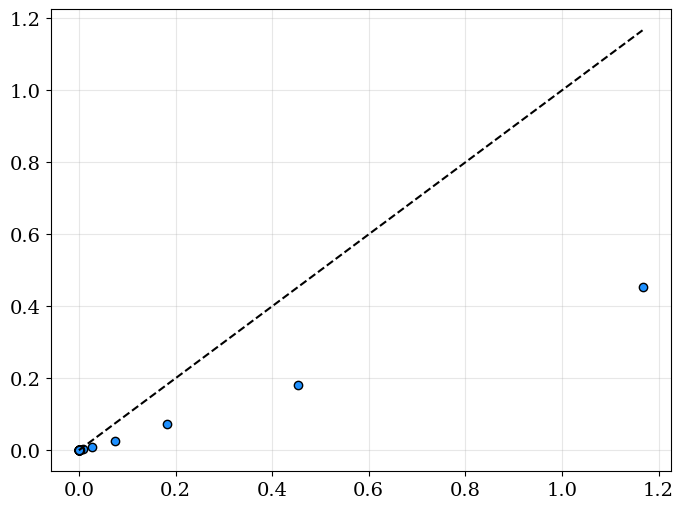

In [13]:
i = 10

x=[]
y=[]
for k in range(len(W)-1):
    x.append(W[k][i])
    y.append(W[k+1][i])

plt.scatter(x,y, color="dodgerblue", edgecolor="k")
plt.plot(np.linspace(min(x), max(x), 100), np.linspace(min(x), max(x), 100), color="k", linestyle="dashed")
plt.show()